# Ford GoBike System Data
## by Lina Montrimaite

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
from math import sin, cos, sqrt, atan2, radians
glob.glob('/pycharm/*') 

%matplotlib inline

In [2]:
path = r'/Users/lina/Documents/GitHub/Ford_GoBikes project/Data'
files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
df.to_csv('fordgo_master.csv', index = False)

In [3]:
ford_gobike = pd.read_csv('fordgo_master.csv')

In [4]:
# review the dataset
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.420000,-121.940000,NaN,NaN,37.410000,-121.940000,4105,Customer,1982.0,Female,No
1,42847,2018-11-30 20:13:45.5090,2018-12-01 08:07:53.1330,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2614,Customer,1992.0,Male,No
2,1128,2018-11-30 23:58:26.4310,2018-12-01 00:17:14.4880,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,1496,Subscriber,1998.0,Male,Yes
3,2476,2018-11-30 23:35:06.7230,2018-12-01 00:16:23.4740,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1334,Subscriber,1959.0,Male,No
4,1273,2018-11-30 23:54:12.3890,2018-12-01 00:15:26.3680,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,-122.409449,393,Subscriber,1993.0,Female,Yes


In [5]:
# overview of data shape and composition
print(ford_gobike.shape)
print(ford_gobike.dtypes)

(2290554, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [6]:
# descriptive statistics for numeric variables
print(ford_gobike.describe())

       duration_sec  start_station_id  start_station_latitude  \
count  2.290554e+06      2.278053e+06            2.290554e+06   
mean   8.227953e+02      1.285395e+02            3.776870e+01   
std    2.150612e+03      1.070669e+02            1.060228e-01   
min    6.100000e+01      3.000000e+00            0.000000e+00   
25%    3.440000e+02      3.900000e+01            3.777041e+01   
50%    5.490000e+02      9.300000e+01            3.778101e+01   
75%    8.620000e+02      2.000000e+02            3.779728e+01   
max    8.628100e+04      4.200000e+02            4.551000e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             2.290554e+06    2.278053e+06          2.290554e+06   
mean             -1.223510e+02    1.271802e+02          3.776855e+01   
std               1.759334e-01    1.071313e+02          1.476720e-01   
min              -1.224737e+02    3.000000e+00          0.000000e+00   
25%              -1.224117e+02    3.600000e+01        

In [7]:
# review the nan values
ford_gobike.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12501
start_station_name          12501
start_station_latitude          0
start_station_longitude         0
end_station_id              12501
end_station_name            12501
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          117281
member_gender              117075
bike_share_for_all_trip         0
dtype: int64

In [8]:
# drop the rows that do not have any values as it includes just 4.6% of the dataset
ford_gobike.dropna(inplace=True)
ford_gobike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
# get the shape of the dataset
print(ford_gobike.shape)

(2161106, 16)


In [10]:
# check duplicated row
ford_gobike[ford_gobike.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### What is the structure of your dataset?

> The dataset recorded Ford GoBike's bike-sharing service in the greater SF Bay area. Each record is an individual ride which consists of 16 features, such as duration, ride start/end time, start and end station id/name, start/end station coordinates, bikes id, user type, member birth year, member age, gender,  and bike share for all trips. 
For this analysis I have selectected one year period from 2018-05 until 2019-04, that contains 2,161,106 bike trips.


### What is/are the main feature(s) of interest in your dataset?

> - When are most trips taken in terms of time of hour, weekday or month of the year?
> - Who are the customers of Ford GoBikes by age, gender and type?
> - How do the bike trips usually look by trip duration, distance and speed?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will be concentrated on three groups of features, such as TIME (hours, weekdays, moths), USER (age, gender, type) and TRAVEL (duration, distance, speed). 

## Data Wrangling and creating new variables

- Convert the duration in seconds to minutes
- Delete values where the station id is null
- Convert the end and start station id to int
- Convert the Start time and End time to timestamps
- Get the start time hour from start time
- Divide the start_time and end_time to separated columns start_date, start_time, end_date and end_date
- Extract the month column from start date
- Get the weekdays column from start time
- Get customer age on the trip day
- Calculate approx trip duration by latitude and longtitude
- Calculate approx trip speed km/h
- Create users age groups column
- Drop unneccassary variables
- Create cleaned and adjusted new csv file

##### Convert the duration in seconds to hours

In [11]:
# code
ford_gobike['duration_min']= ford_gobike['duration_sec']/60
ford_gobike['duration_min']= ford_gobike['duration_min'].astype(float)
# test
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
1,42847,2018-11-30 20:13:45.5090,2018-12-01 08:07:53.1330,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2614,Customer,1992.0,Male,No,714.116667
2,1128,2018-11-30 23:58:26.4310,2018-12-01 00:17:14.4880,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,1496,Subscriber,1998.0,Male,Yes,18.800000
3,2476,2018-11-30 23:35:06.7230,2018-12-01 00:16:23.4740,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1334,Subscriber,1959.0,Male,No,41.266667
4,1273,2018-11-30 23:54:12.3890,2018-12-01 00:15:26.3680,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,-122.409449,393,Subscriber,1993.0,Female,Yes,21.216667
5,2264,2018-11-30 23:32:51.3200,2018-12-01 00:10:35.8310,92.0,Mission Bay Kids Park,37.772301,-122.393028,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,4377,Subscriber,1972.0,Male,Yes,37.733333


##### Delete values where the station id is null

In [12]:
# code
ford_gobike[ford_gobike['start_station_id'].isna()]
ford_gobike.dropna(subset = ['start_station_id'], inplace=True)
# test
ford_gobike[ford_gobike['start_station_id'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min


##### Convert the Start time and End time to timestamps

In [13]:
# code
ford_gobike.start_time = pd.to_datetime(ford_gobike.start_time)
ford_gobike.end_time = pd.to_datetime(ford_gobike.start_time)
#test
ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161106 entries, 1 to 2290553
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
 16  duration_min             float64       
dtypes: datetime64[ns](2), float

##### Get the start time hour from start time

In [14]:
# code
ford_gobike['start_hour'] = ford_gobike['start_time'].dt.hour
# test
ford_gobike['start_hour'].unique()

array([20, 23, 21, 22, 19, 18, 17, 16, 15, 10, 14, 11, 13, 12,  9,  8,  7,
        6,  5,  4,  3,  2,  1,  0])

##### Divide the start_time and end_time to separated  columns start_date, start_time, end_date and end_date

In [15]:
# code
ford_gobike['start_date'] = pd.to_datetime(ford_gobike['start_time']).dt.date
ford_gobike['start_time'] = pd.to_datetime(ford_gobike['start_time']).dt.time
# test
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_hour,start_date
1,42847,20:13:45.509000,2018-11-30 20:13:45.509,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2614,Customer,1992.0,Male,No,714.116667,20,2018-11-30
2,1128,23:58:26.431000,2018-11-30 23:58:26.431,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,1496,Subscriber,1998.0,Male,Yes,18.800000,23,2018-11-30
3,2476,23:35:06.723000,2018-11-30 23:35:06.723,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1334,Subscriber,1959.0,Male,No,41.266667,23,2018-11-30
4,1273,23:54:12.389000,2018-11-30 23:54:12.389,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,-122.409449,393,Subscriber,1993.0,Female,Yes,21.216667,23,2018-11-30
5,2264,23:32:51.320000,2018-11-30 23:32:51.320,92.0,Mission Bay Kids Park,37.772301,-122.393028,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,4377,Subscriber,1972.0,Male,Yes,37.733333,23,2018-11-30


##### Extract the month column from start date

In [16]:
# code
ford_gobike['start_date2'] =  pd.to_datetime(ford_gobike['start_date'], format='%Y-%m-%d')
ford_gobike['start_year'] = ford_gobike['start_date2'].apply(lambda r:r.year).astype(int)
ford_gobike['start_month'] = ford_gobike['start_date2'].apply(lambda r:r.month).astype(int)
# test
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_hour,start_date,start_date2,start_year,start_month
1,42847,20:13:45.509000,2018-11-30 20:13:45.509,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Customer,1992.0,Male,No,714.116667,20,2018-11-30,2018-11-30,2018,11
2,1128,23:58:26.431000,2018-11-30 23:58:26.431,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,...,Subscriber,1998.0,Male,Yes,18.800000,23,2018-11-30,2018-11-30,2018,11
3,2476,23:35:06.723000,2018-11-30 23:35:06.723,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Subscriber,1959.0,Male,No,41.266667,23,2018-11-30,2018-11-30,2018,11
4,1273,23:54:12.389000,2018-11-30 23:54:12.389,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,...,Subscriber,1993.0,Female,Yes,21.216667,23,2018-11-30,2018-11-30,2018,11
5,2264,23:32:51.320000,2018-11-30 23:32:51.320,92.0,Mission Bay Kids Park,37.772301,-122.393028,34.0,Father Alfred E Boeddeker Park,37.783988,...,Subscriber,1972.0,Male,Yes,37.733333,23,2018-11-30,2018-11-30,2018,11


##### Get the weekdays column from start time

In [17]:
# code
ford_gobike['start_weekday'] = ford_gobike.start_date2.dt.strftime('%a')
# test
ford_gobike['start_weekday'].unique()

array(['Fri', 'Thu', 'Wed', 'Tue', 'Mon', 'Sun', 'Sat'], dtype=object)

##### Get customer age on the trip day

In [18]:
# code
ford_gobike['user_age'] = ford_gobike['start_year'] - ford_gobike['member_birth_year']
ford_gobike['user_age'] = ford_gobike['user_age'].astype(int)
# test
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,duration_min,start_hour,start_date,start_date2,start_year,start_month,start_weekday,user_age
1,42847,20:13:45.509000,2018-11-30 20:13:45.509,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Male,No,714.116667,20,2018-11-30,2018-11-30,2018,11,Fri,26
2,1128,23:58:26.431000,2018-11-30 23:58:26.431,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,...,Male,Yes,18.800000,23,2018-11-30,2018-11-30,2018,11,Fri,20
3,2476,23:35:06.723000,2018-11-30 23:35:06.723,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Male,No,41.266667,23,2018-11-30,2018-11-30,2018,11,Fri,59
4,1273,23:54:12.389000,2018-11-30 23:54:12.389,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,...,Female,Yes,21.216667,23,2018-11-30,2018-11-30,2018,11,Fri,25
5,2264,23:32:51.320000,2018-11-30 23:32:51.320,92.0,Mission Bay Kids Park,37.772301,-122.393028,34.0,Father Alfred E Boeddeker Park,37.783988,...,Male,Yes,37.733333,23,2018-11-30,2018-11-30,2018,11,Fri,46


##### Create users age groups column

In [19]:
# code
pd.DataFrame(ford_gobike, columns=['user_age'])

bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83]
labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '63-67', '68-72', '73-77', '78+']
ford_gobike['age_range'] = pd.cut(ford_gobike.user_age, bins, labels = labels,include_lowest = True)

In [20]:
#test
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,duration_min,start_hour,start_date,start_date2,start_year,start_month,start_weekday,user_age,age_range
1,42847,20:13:45.509000,2018-11-30 20:13:45.509,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,No,714.116667,20,2018-11-30,2018-11-30,2018,11,Fri,26,23-27
2,1128,23:58:26.431000,2018-11-30 23:58:26.431,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,...,Yes,18.800000,23,2018-11-30,2018-11-30,2018,11,Fri,20,18-22
3,2476,23:35:06.723000,2018-11-30 23:35:06.723,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,41.266667,23,2018-11-30,2018-11-30,2018,11,Fri,59,58-62
4,1273,23:54:12.389000,2018-11-30 23:54:12.389,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,...,Yes,21.216667,23,2018-11-30,2018-11-30,2018,11,Fri,25,23-27
5,2264,23:32:51.320000,2018-11-30 23:32:51.320,92.0,Mission Bay Kids Park,37.772301,-122.393028,34.0,Father Alfred E Boeddeker Park,37.783988,...,Yes,37.733333,23,2018-11-30,2018-11-30,2018,11,Fri,46,43-47


##### Calculate approx trip duration by latitude and longtitude

In [21]:
# code
def distance_calculation(ford_gobike):
    #Thus, the implied "official" circumference is 360 degrees times 60 minutes/degree times 1.852 km/minute = 40003.2 km. The implied radius is the circumference divided by 2 pi: R = 6367 km 
    R = 6373.0 

    lat1 = radians(ford_gobike['start_station_latitude'])
    lon1 = radians(ford_gobike['start_station_longitude'])
    lat2 = radians(ford_gobike['end_station_latitude'])
    lon2 = radians(ford_gobike['end_station_longitude'])

# using Deriving the Haversine Formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

ford_gobike['distance'] = ford_gobike.apply(distance_calculation, axis=1)

In [22]:
(ford_gobike.distance ==0).sum()

51969

In [23]:
ford_gobike = ford_gobike[ford_gobike.distance !=0]

In [24]:
# test
ford_gobike['distance'].describe()

count    2.109137e+06
mean     1.800562e+00
std      3.842420e+01
min      1.329149e-02
25%      9.279180e-01
50%      1.426658e+00
75%      2.173342e+00
max      1.280236e+04
Name: distance, dtype: float64

##### Calculate approx trip speed km/h

In [25]:
# code
ford_gobike['speed km/h'] = round(ford_gobike['distance']/(ford_gobike['duration_min']/60),2)

In [26]:
# test
ford_gobike['speed km/h'].value_counts()

11.17    2842
10.56    2817
9.96     2817
9.77     2812
10.06    2812
         ... 
26.01       1
26.49       1
26.26       1
26.51       1
27.66       1
Name: speed km/h, Length: 2562, dtype: int64

##### Drop unneccassary variables

In [27]:
ford_gobike.drop(columns = ['bike_share_for_all_trip','end_time',
                 'start_station_id','end_station_id',
                'start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                 'end_station_longitude', 'start_date', 'bike_id',
                 'start_station_name', 'end_station_name', 'member_birth_year'], inplace=True, axis=1)

In [28]:
# test
ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109137 entries, 1 to 2290553
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   duration_sec   int64         
 1   start_time     object        
 2   user_type      object        
 3   member_gender  object        
 4   duration_min   float64       
 5   start_hour     int64         
 6   start_date2    datetime64[ns]
 7   start_year     int64         
 8   start_month    int64         
 9   start_weekday  object        
 10  user_age       int64         
 11  age_range      category      
 12  distance       float64       
 13  speed km/h     float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 227.3+ MB


##### Create cleaned and adjusted new csv file

In [29]:
# code
ford_gobike.to_csv('fordgo_final.csv', index = False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. 

### Exploration of TIME variables 

> I'll start by looking at the distribution of the customer age.

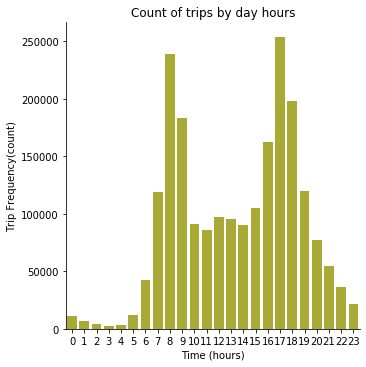

In [30]:
sb.catplot(data=ford_gobike, x='start_hour', kind='count', color = sb.color_palette()[8])
plt.title('Count of trips by day hours')
plt.xlabel('Time (hours)')
plt.ylabel('Trip Frequency(count)')
plt.show();

> Trip start hour distribution looks roughly bimodal, with one peak between 7 and 9 hours, and a second peak between 16 and 19 hour which are a little higher. It shows that bikes are used before and after the working hour. Customers used bikes to travel to work and back.

Next up, the trip distribution on weekdays.

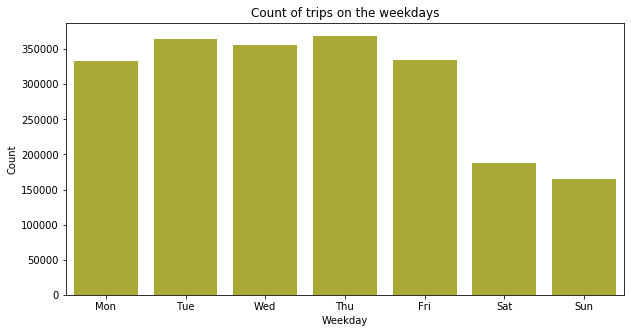

In [31]:
plt.figure(figsize=[10, 5])
order_d = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=ford_gobike, x='start_weekday', color = sb.color_palette()[8], order = order_d);
plt.title('Count of trips on the weekdays')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show();

>Trip start weekday distributions are similar on working days but on weekends are followed down almost twice. The visualisation below proves that customers use bikes mostly on weekdays.

Next up, the trip distribution by monthly.

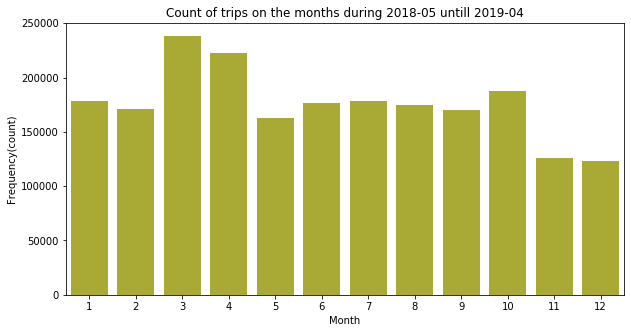

In [32]:
plt.figure(figsize=[10, 5])
sb.countplot(data=ford_gobike, x='start_month', color = sb.color_palette()[8]);
plt.title('Count of trips on the months during 2018-05 untill 2019-04')
plt.xlabel('Month')
plt.ylabel('Frequency(count)')
plt.show();

> Trip count on start month distribution is highest in March, April and October and lowest in November and December.

Next below, all three plots displayed together.

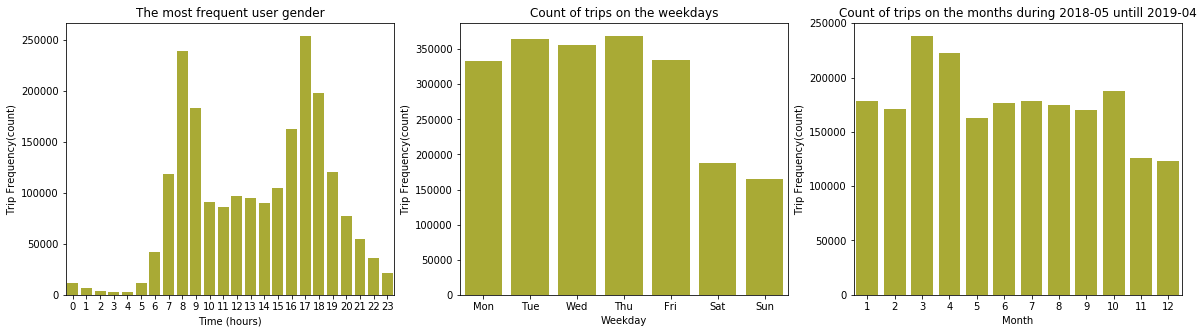

In [33]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
sb.countplot(data=ford_gobike, x='start_hour', color = sb.color_palette()[8]);
plt.title('The most frequent user gender')
plt.xlabel('Time (hours)')
plt.ylabel('Trip Frequency(count)')

plt.subplot(1, 3, 2)
order_d = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=ford_gobike, x='start_weekday', color = sb.color_palette()[8], order = order_d);
plt.title('Count of trips on the weekdays')
plt.xlabel('Weekday')
plt.ylabel('Trip Frequency(count)')

plt.subplot(1, 3, 3)
sb.countplot(data=ford_gobike, x='start_month', color = sb.color_palette()[8]);
plt.title('Count of trips on the months during 2018-05 untill 2019-04')
plt.xlabel('Month')
plt.ylabel('Trip Frequency(count)')
plt.show();

> From the above figure plots we can make final trip frequency distribution by time variables. So we could say that the most customers use bikes  at 8 and 17 hour, during workdays and in March and April months.

Next up, exploration of Customer variables.

### Exploration of USER variables 

In [34]:
pd.set_option('display.max_rows', 1000)
ford_gobike['user_age'].value_counts()

30     120591
31     112223
29     104386
28     102789
27      97012
25      96681
26      95346
32      95053
33      93856
34      83654
24      82194
35      77802
36      71820
23      63780
37      60224
38      56513
39      49838
22      44232
40      42798
41      42068
21      35257
42      35122
43      34207
44      31180
45      29083
46      27074
47      26661
20      26005
50      23289
48      22433
49      21456
51      20367
53      19738
19      17001
54      16187
55      15482
52      15067
56      14061
57      12609
58      10946
59       9726
60       8333
61       6678
62       6380
18       5106
64       3782
63       3699
66       3357
65       2737
68       1928
67       1873
69       1653
70       1137
71       1029
73        891
74        648
72        633
118       468
76        464
75        317
88        313
87        238
119       221
77        190
85        167
82        136
86        105
107       100
83         93
116        83
98         81
78    

>For user age, there are some false ages provided as there are ages until 141 years.
 I will eliminate the ages who are 2.5 times higher than the mean.

In [35]:
# dropping false age entries
ford_gobike = ford_gobike.drop(ford_gobike.index[(ford_gobike['user_age'] > (2.5*ford_gobike['user_age'].mean()))])

In [36]:
# review current age values
ford_gobike['user_age'].unique()

array([26, 59, 25, 46, 27, 30, 32, 50, 33, 45, 24, 31, 22, 37, 23, 34, 38,
       41, 51, 36, 47, 29, 52, 42, 73, 53, 48, 28, 20, 35, 39, 44, 65, 21,
       58, 40, 68, 19, 54, 56, 43, 55, 49, 18, 66, 64, 57, 70, 60, 61, 62,
       69, 76, 63, 67, 71, 75, 77, 85, 83, 72, 80, 74, 78, 86, 84, 81, 79,
       82])

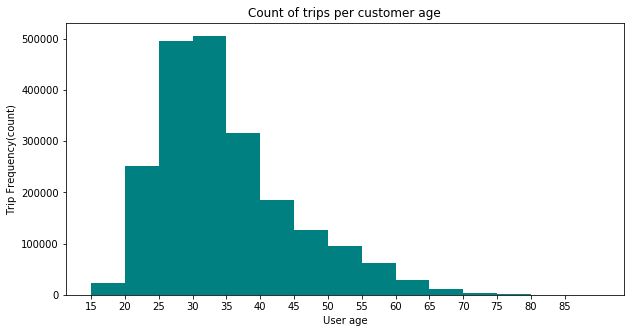

In [37]:
binsize = 5
bins = np.arange(15, ford_gobike['user_age'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = ford_gobike, x = 'user_age', bins = bins, color = 'teal')
ticks = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

labels = ['{}'.format(val) for val in ticks]
plt.xticks(ticks, labels)

plt.title('Count of trips per customer age')
plt.xlabel('User age')
plt.ylabel('Trip Frequency(count)')
plt.show();

> The customer age distribution histogram shows that the most of the customers are between 25 and 35 years old.

Next, I will look at the trip frequency by the customer's gender.

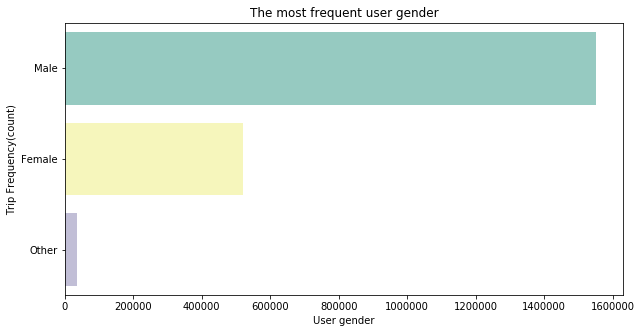

In [38]:
plt.figure(figsize=[10, 5])
sb.countplot(data=ford_gobike, y='member_gender', palette = 'Set3');
plt.title('The most frequent user gender')
plt.xlabel('User gender')
plt.ylabel('Trip Frequency(count)')
plt.show();

#color = sb.color_palette()[9]

>Based on the above countplot we can clearly observe that the male customers are using Ford GoBikes 3 times more than women.

Next up, customers distribution by customer type.

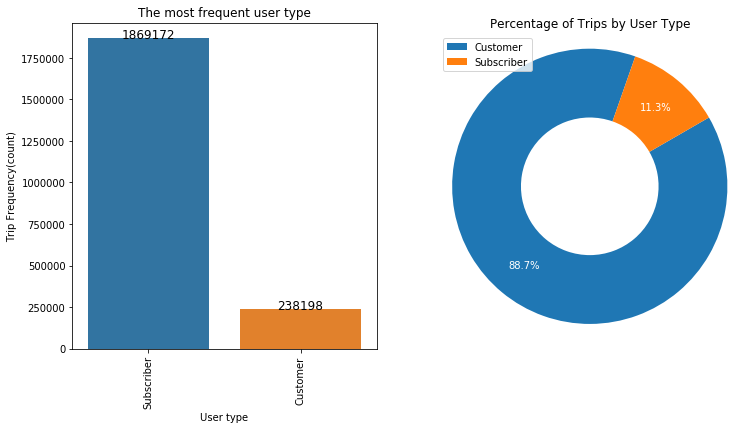

In [39]:
user_type_counts = ford_gobike['user_type'].value_counts()

plt.figure(figsize=[12, 6])

plt.subplot(1, 2, 1)
user_type_counts = ford_gobike['user_type'].value_counts()
sb.barplot(user_type_counts.index, user_type_counts)
plt.xticks(rotation=90)

for i in range (user_type_counts.shape[0]):
    count = user_type_counts[i]
    plt.text(i, count+1, count, ha = 'center', va= 'baseline', fontsize=12)

#data=ford_gobike, x='user_type', color = sb.color_palette()[2]);
plt.title('The most frequent user type')
plt.xlabel('User type')
plt.ylabel('Trip Frequency(count)')

plt.subplot(1, 2, 2)
plt.pie(user_type_counts, startangle = 30, autopct='%1.1f%%', pctdistance=0.75, labels=['Customer', 'Subscriber'], textprops={'color':'white'}, counterclock = False, wedgeprops = {'width' : 0.5});
plt.axis('square');
plt.title("Percentage of Trips by User Type")
plt.legend()
plt.show();

> From two plots we can see that most bike users are subscribers and just small slides are random customers. Probably the local people are most likely subscribers and tourists are customers.

Next below, exploration of travel variables.

### Exploration of TRAVEL variables

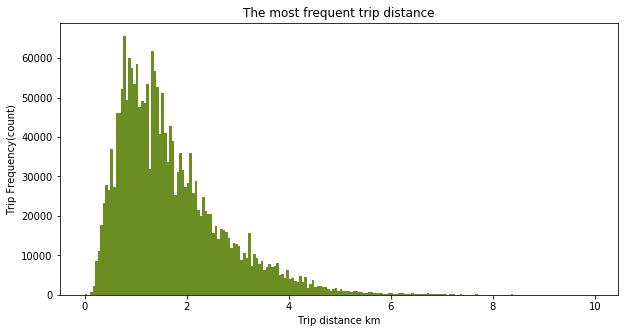

In [40]:
# start with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, 10, 0.05)
plt.figure(figsize=[10, 5])
plt.hist(data = ford_gobike, x = 'distance', bins = bins, color = 'olivedrab')

plt.title('The most frequent trip distance')
plt.xlabel('Trip distance km')
plt.ylabel('Trip Frequency(count)')
plt.show();

>Trip distance (km) has a long-tailed distribution. The distance distribution have peak between 0.5 and 1.5 km. Most of the customers have short distance trips.

Next up, trip duration (min) distribution.

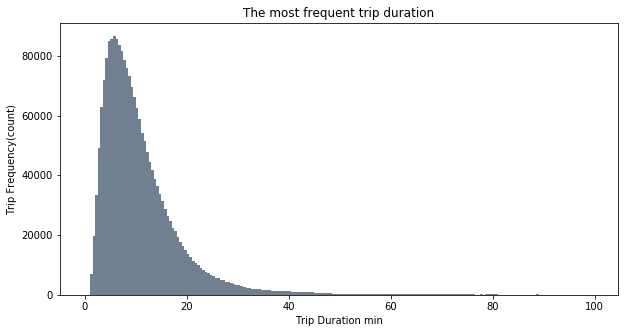

In [41]:
# start with a standard-scaled plot
binsize = 1
bins = np.arange(0, 100, 1/2)
plt.figure(figsize=[10, 5])
plt.hist(data = ford_gobike, x = 'duration_min', bins = bins, color = 'slategrey')

plt.title('The most frequent trip duration')
plt.xlabel('Trip Duration min')
plt.ylabel('Trip Frequency(count)')
plt.show();

> From the above histogram we can see that the duration distribution is long-tailed with the peak around 5 minutes. Most of the trips take 5- 10 minutes.

Next up, trip speed distribution. 

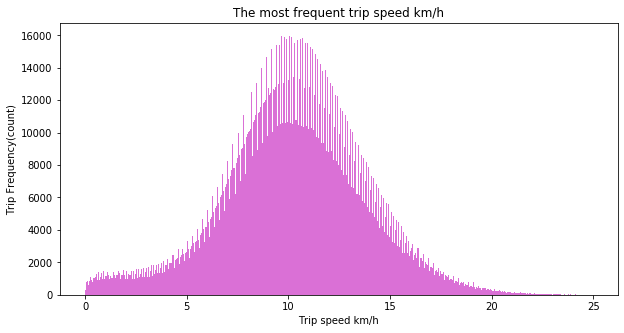

In [42]:
binsize = 0.01
bins = np.arange(0, 25, 0.05)
plt.figure(figsize=[10, 5])
plt.hist(data = ford_gobike, x = 'speed km/h', bins = bins, color = 'orchid')

plt.title('The most frequent trip speed km/h')
plt.xlabel('Trip speed km/h')
plt.ylabel('Trip Frequency(count)')
plt.show();

> Based on histogram the bike trip speeds are most frequent to be at 10 km/h speed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Exploration of time variables showed that customers used bikes most for travel to work and back on the workdays. The most interesting discovery, that bikes are used most during the spring and autumn season. 

- Exploration of customer variables showed that customers are mostly young men between 25 and 35 who are locals and have Ford GoBikes subscriptions. Surprising fact that men are using bikes  3 times more than womens.

- Exploration of travel variables shows that customers usually have short trips and use small speed.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- For customer age, there was some false ages provided as there are ages until 141 years. I have eliminate the ages who are 2.5 times higher than the mean.

- The trip duration, distance and speed had long tales so I selected a range of data to elimite the tales  to have a better visualization.